# Mobile game SB Project

for the developer of the mobile game Space Brothers. The goal is to create a monetization model.

## Content plan

1. [Step1](#Step1) Opening the data file and studing the general information
2. [Step2](#Step2) Preparing the data
3. [Step3](#Step3) Analysing the data
4. [Step4](#Step4) Testing statistical hypothesis 
5. [Overall conclusion](#oc)


### Step1

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [3]:
source = pd.read_csv('user_source_us.csv')
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     13576 non-null  object
 1   event_date  13576 non-null  object
 2   source      13576 non-null  object
dtypes: object(3)
memory usage: 318.3+ KB


In [4]:
source.head()

,user_id,event_date,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,google_play_ads
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,youtube_channel_network
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,facebook_ads


In [5]:
source.describe()

,user_id,event_date,source
count,13576,13576,13576
unique,13576,7,4
top,13c2eec6-170f-4503-868c-6c637a4a7bbd,2020-05-04,google_play_ads
freq,1,5860,4817


In [6]:
ad_cost=pd.read_csv('ad_costs_us.csv')
ad_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [7]:
ad_cost.head(5)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [8]:
events=pd.read_csv('events_us.csv')
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [9]:
events.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [10]:
events.tail()

,event_datetime,event,building_type,user_id,project_type
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN
135639,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN


In [11]:
events.describe()

,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-07 03:10:43,building,spaceport,ff841992-d93b-462e-bc6e-18c24a514f36,satellite_orbital_assembly
freq,4,127957,59325,22,1866


In [12]:
events['event'].value_counts()

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [13]:
events['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14138
Name: building_type, dtype: int64

In [14]:
events['project_type'].value_counts()

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

In [15]:
events['building_type'].isnull().sum()

7683

It seems, the values in the building type column are missing for those types of events where they are not provided.

In [16]:
events.query('event == "finished_stage_1"' or 'event == "project"')['user_id'].nunique()

5817

In [17]:
events.query('event == "finished_stage_1"' and 'event == "project"')['user_id'].nunique()

1866

In [18]:
events.query('event != "building"')['user_id'].nunique()


5817

Based on the data, we can say that some of the players with the finished_stage_1 status also have an event project, which means that they completed the first level by building a satellite station.

### Step2

Convert the data to the required types

In [19]:
source['event_date'] = pd.to_datetime(source['event_date'], format="%Y-%m-%d")
ad_cost['day'] = pd.to_datetime(ad_cost['day'], format="%Y-%m-%d")
events['event_datetime'] = pd.to_datetime(events['event_datetime'], format="%Y-%m-%d %H:%M:%S")
events.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [20]:
events.duplicated().sum()

1

In [21]:
ad_cost.duplicated().sum()

0

In [22]:
source.duplicated().sum()

0

In [23]:
events.drop_duplicates(inplace=True)
events.duplicated().sum()

0

There are no duplicates and all data types are as required.

### Step3

**Make cohorts
How long does it take from the moment of clicking on the advertisement to the first event.
Look at how many users have reached the end of the first stage. How long did it take.**

In [24]:
events[events['event'] == 'finished_stage_1']['user_id'].nunique()

5817

First stage finished 5817 users

In [25]:
first_event = events.groupby(['user_id']).agg({'event_datetime': 'min'}).reset_index()
first_event.columns = ['user_id', 'first_event']
first_event['first_event'] = first_event['first_event'].dt.date
first_event['first_event'] = pd.to_datetime(first_event['first_event'], format="%Y-%m-%d")
first_event.head() 

,user_id,first_event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05


In [26]:
events_ = pd.merge(events, first_event, on='user_id')
events_total = pd.merge(events_, source, on='user_id')
events_total.head()

,event_datetime,event,building_type,user_id,project_type,first_event,event_date,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network


In [27]:
events_total['time_to_first_event'] = events_total['first_event'] - events_total['event_date']
event_time = events_total.pivot_table(index='event_date', columns='time_to_first_event', values='user_id', aggfunc=['count','nunique'])
event_time

,count,nunique
time_to_first_event,0 days,0 days
event_date,,
2020-05-04,64226,5860
2020-05-05,34756,3361
2020-05-06,17399,1847
2020-05-07,9429,1109
2020-05-08,5121,688
2020-05-09,3025,440
2020-05-10,1683,271


All the users made the first event on the same day when they clicked on the advertisement.

In [28]:
users_per_cohort = events_total.groupby('first_event').agg({'user_id': 'nunique'}).reset_index()
users_per_cohort.columns = ['first_event', 'n_users']
users_per_cohort

,first_event,n_users
0,2020-05-04,5860
1,2020-05-05,3361
2,2020-05-06,1847
3,2020-05-07,1109
4,2020-05-08,688
5,2020-05-09,440
6,2020-05-10,271


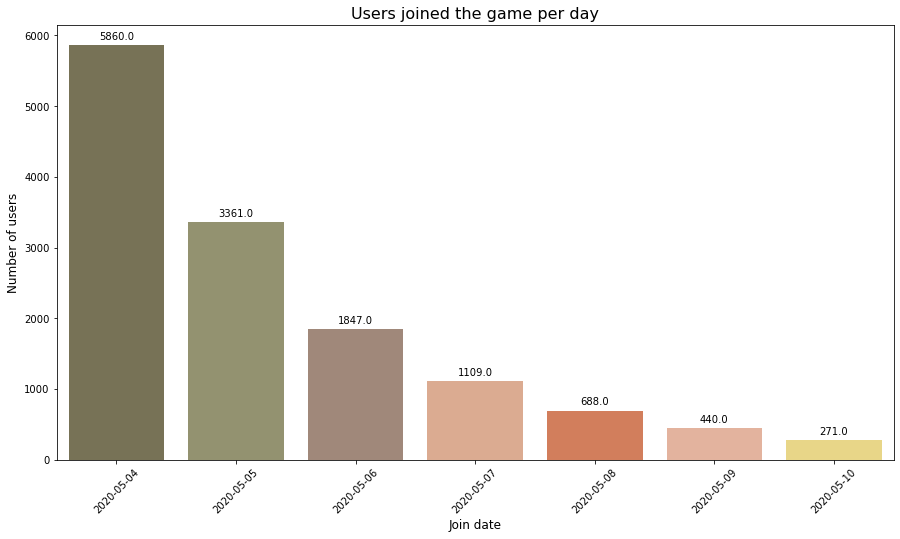

In [29]:
colors = ['#7d7650', '#99986a', '#a68674', '#e7a885', '#e67548', '#eeaf93', '#f8e078']


plt.subplots(figsize=(15, 8))
x_dates = users_per_cohort['first_event'].dt.strftime('%Y-%m-%d')
ax = sns.barplot(x=x_dates, y='n_users', data=users_per_cohort, palette=colors)

plt.title('Users joined the game per day', fontsize=16)
plt.xlabel('Join date', fontsize=12)
plt.ylabel('Number of users', fontsize=12)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height()),
               (p.get_x()+p.get_width()/2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

We clearly see that every day the number of players starting to play is significantly decreasing. Let's see how long it takes to complete the first step.

In [30]:
finish_date = events_total[events_total['event'] == 'finished_stage_1'].groupby('user_id').agg({'event_datetime': 'min'}).reset_index()
finish_date.columns = ['user_id', 'finish_date']
finish_date['finish_date'] = finish_date['finish_date'].dt.date
finish_date['finish_date'] = pd.to_datetime(finish_date['finish_date'], format="%Y-%m-%d")
finish_date.head() 

,user_id,finish_date
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16


In [31]:
finish_ = events_total.query('event == "finished_stage_1"').reset_index(drop=True)
finish_group = pd.merge(finish_, finish_date, on='user_id')
finish_group.head()

,event_datetime,event,building_type,user_id,project_type,first_event,event_date,source,time_to_first_event,finish_date
0,2020-05-15 05:29:13,finished_stage_1,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,2020-05-04,facebook_ads,0 days,2020-05-15
1,2020-05-16 11:51:58,finished_stage_1,NaN,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,2020-05-04,instagram_new_adverts,0 days,2020-05-16
2,2020-05-11 14:18:05,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,2020-05-04,google_play_ads,0 days,2020-05-11
3,2020-05-16 13:08:11,finished_stage_1,NaN,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,2020-05-04,2020-05-04,facebook_ads,0 days,2020-05-16
4,2020-05-18 03:50:27,finished_stage_1,NaN,65a92713-5969-48b1-8945-bfefa5063887,NaN,2020-05-04,2020-05-04,google_play_ads,0 days,2020-05-18


In [32]:
finish_group['time_to_finish'] = finish_group['finish_date'] - finish_group['first_event']
finish_time = finish_group.pivot_table(index='first_event', columns='time_to_finish', values='user_id', aggfunc=['count','nunique'])
finish_time

count                                                          \
time_to_finish 0 days 1 days 2 days 3 days 4 days 5 days 6 days 7 days 8 days   
first_event                                                                     
2020-05-04        1.0    3.0    3.0    4.0   15.0   26.0   82.0  136.0  186.0   
2020-05-05        NaN    1.0    5.0    6.0   19.0   39.0   55.0   75.0  103.0   
2020-05-06        NaN    2.0    4.0    9.0   16.0   22.0   27.0   45.0   53.0   
2020-05-07        NaN    3.0    3.0    7.0   10.0   11.0   15.0   23.0   27.0   
2020-05-08        NaN    3.0    7.0    9.0    8.0    7.0   13.0   19.0   12.0   
2020-05-09        NaN    NaN    1.0    4.0    6.0    3.0    7.0    8.0    6.0   
2020-05-10        NaN    NaN    2.0    NaN    1.0    4.0    3.0    5.0    4.0   

                       ... nunique                                          \
time_to_finish 9 days  ... 22 days 23 days 24 days 25 days 26 days 27 days   
first_event            ...                                                   
2020-05-04      213.0  ...    11.0    13.0     3.0     5.0     2.0     1.0   
2020-05-05      133.0  ...     9.0     6.0     1.0     4.0     NaN     2.0   
2020-05-06       64.0  ...     4.0     3.0     NaN     NaN     1.0     1.0   
2020-05-07       35.0  ...     3.0     2.0     2.0     2.0     1.0     NaN   
2020-05-08       24.0  ...     1.0     1.0     NaN     NaN     1.0     1.0   
2020-05-09        9.0  ...     1.0     1.0     NaN     1.0     NaN     NaN   
2020-05-10        3.0  ...     NaN     1.0     NaN     NaN     NaN     NaN   

                                                
time_to_finish 28 days 29 days 30 days 31 days  
first_event                                     
2020-05-04         1.0     1.0     1.0     2.0  
2020-05-05         1.0     NaN     NaN     NaN  
2020-05-06         NaN     1.0     1.0     NaN  
2020-05-07         1.0     2.0     NaN     NaN  
2020-05-08         NaN     NaN     NaN     NaN  
2020-05-09         NaN     NaN     NaN     NaN  
2020-05-10         NaN     NaN     NaN     NaN  

[7 rows x 64 columns]

In [33]:
finish_group['time_to_finish'].describe()

count                       5817
mean     11 days 19:24:13.739040
std       4 days 01:49:31.756241
min              0 days 00:00:00
25%              9 days 00:00:00
50%             12 days 00:00:00
75%             14 days 00:00:00
max             31 days 00:00:00
Name: time_to_finish, dtype: object

As we can see players complete the first level on average in 11-12 days. It can also be seen that the later the players joined, the fewer people went to the finish line.

**Group users by number of events**

In [34]:
events_per_cohort = events_total.groupby(['first_event']).agg({'event': 'count'}).reset_index()
events_per_cohort.columns = ['first_event', 'n_events']
events_per_cohort

,first_event,n_events
0,2020-05-04,64226
1,2020-05-05,34756
2,2020-05-06,17399
3,2020-05-07,9429
4,2020-05-08,5121
5,2020-05-09,3025
6,2020-05-10,1683


In [35]:
cohort_events = pd.merge(users_per_cohort, events_per_cohort, on='first_event')
cohort_events

,first_event,n_users,n_events
0,2020-05-04,5860,64226
1,2020-05-05,3361,34756
2,2020-05-06,1847,17399
3,2020-05-07,1109,9429
4,2020-05-08,688,5121
5,2020-05-09,440,3025
6,2020-05-10,271,1683


In [36]:
cohort_finish = events_total[events_total['event'] == 'finished_stage_1'].groupby(['first_event']).agg({'event': 'count'}).reset_index()
cohort_finish.columns = ['first_event', 'n_finish']
cohort_finish  

,first_event,n_finish
0,2020-05-04,2670
1,2020-05-05,1513
2,2020-05-06,771
3,2020-05-07,412
4,2020-05-08,235
5,2020-05-09,134
6,2020-05-10,82


In [37]:
cohort_events_total = pd.merge(cohort_events, cohort_finish, on='first_event')
cohort_events_total

,first_event,n_users,n_events,n_finish
0,2020-05-04,5860,64226,2670
1,2020-05-05,3361,34756,1513
2,2020-05-06,1847,17399,771
3,2020-05-07,1109,9429,412
4,2020-05-08,688,5121,235
5,2020-05-09,440,3025,134
6,2020-05-10,271,1683,82


In [38]:
cohort_events_total['avg_events_per_user'] = cohort_events_total['n_events'] / cohort_events_total['n_users']
cohort_events_total['ratio_finished'] = cohort_events_total['n_finish'] / cohort_events_total['n_users']
cohort_events_total

,first_event,n_users,n_events,n_finish,avg_events_per_user,ratio_finished
0,2020-05-04,5860,64226,2670,10.960068,0.455631
1,2020-05-05,3361,34756,1513,10.340970,0.450164
2,2020-05-06,1847,17399,771,9.420141,0.417434
3,2020-05-07,1109,9429,412,8.502254,0.371506
4,2020-05-08,688,5121,235,7.443314,0.341570
5,2020-05-09,440,3025,134,6.875000,0.304545
6,2020-05-10,271,1683,82,6.210332,0.302583


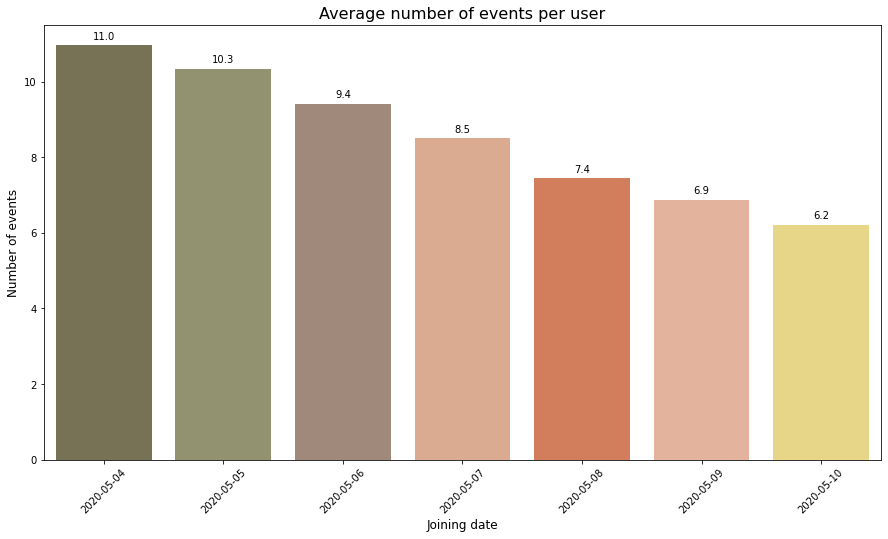

In [39]:
colors = ['#7d7650', '#99986a', '#a68674', '#e7a885', '#e67548', '#eeaf93', '#f8e078']

plt.subplots(figsize=(15, 8))
x_dates = cohort_events_total['first_event'].dt.strftime('%Y-%m-%d')
ax = sns.barplot(x=x_dates, y="avg_events_per_user", data=cohort_events_total, palette = colors)

plt.title('Average number of events per user', fontsize=16)
plt.xlabel('Joining date', fontsize=12)
plt.ylabel('Number of events', fontsize=12)
plt.xticks(rotation=45)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
               (p.get_x()+p.get_width()/2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

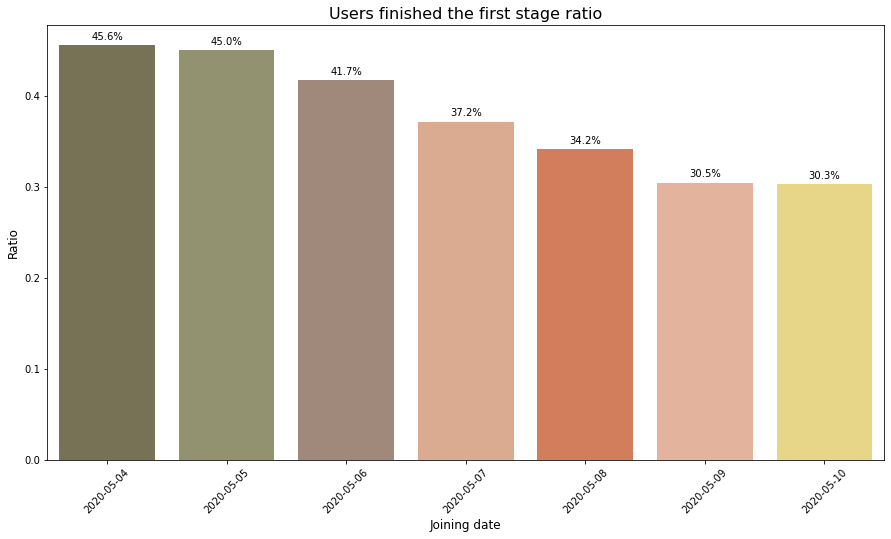

In [40]:
colors = ['#7d7650', '#99986a', '#a68674', '#e7a885', '#e67548', '#eeaf93', '#f8e078']

plt.subplots(figsize=(15, 8))
x_dates = cohort_events_total['first_event'].dt.strftime('%Y-%m-%d')
ax = sns.barplot(x=x_dates, y="ratio_finished", data=cohort_events_total, palette = colors)

plt.title('Users finished the first stage ratio', fontsize=16)
plt.xlabel('Joining date', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.xticks(rotation=45)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1%'),
               (p.get_x()+p.get_width()/2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

Now we can say for sure that not only the number of attracted new players is decreasing, but also the interest of new users in the game itself. With a difference of only 7 days in the game, the number of events decreased from 11 to 6 on average, the percentage of those who completed the first stage - from 45 to 30.

**Group users by number of buildings they built.**

In [41]:
build_type=events_total.groupby(['first_event', 'building_type']).agg({'user_id': 'count'}).reset_index()
build_type.columns = ['first_event', 'building_type', 'n_build']
build_type.head()

,first_event,building_type,n_build
0,2020-05-04,assembly_shop,28029
1,2020-05-04,research_center,6848
2,2020-05-04,spaceport,25758
3,2020-05-05,assembly_shop,14400
4,2020-05-05,research_center,3760


In [42]:
n_build_type = pd.merge(build_type, users_per_cohort, on='first_event')
n_build_type['avg_n_build_per_user'] = n_build_type['n_build'] / n_build_type['n_users']
n_build_type.head()

,first_event,building_type,n_build,n_users,avg_n_build_per_user
0,2020-05-04,assembly_shop,28029,5860,4.783106
1,2020-05-04,research_center,6848,5860,1.168601
2,2020-05-04,spaceport,25758,5860,4.395563
3,2020-05-05,assembly_shop,14400,3361,4.284439
4,2020-05-05,research_center,3760,3361,1.118715


Text(0, 0.5, 'Number of constructions')

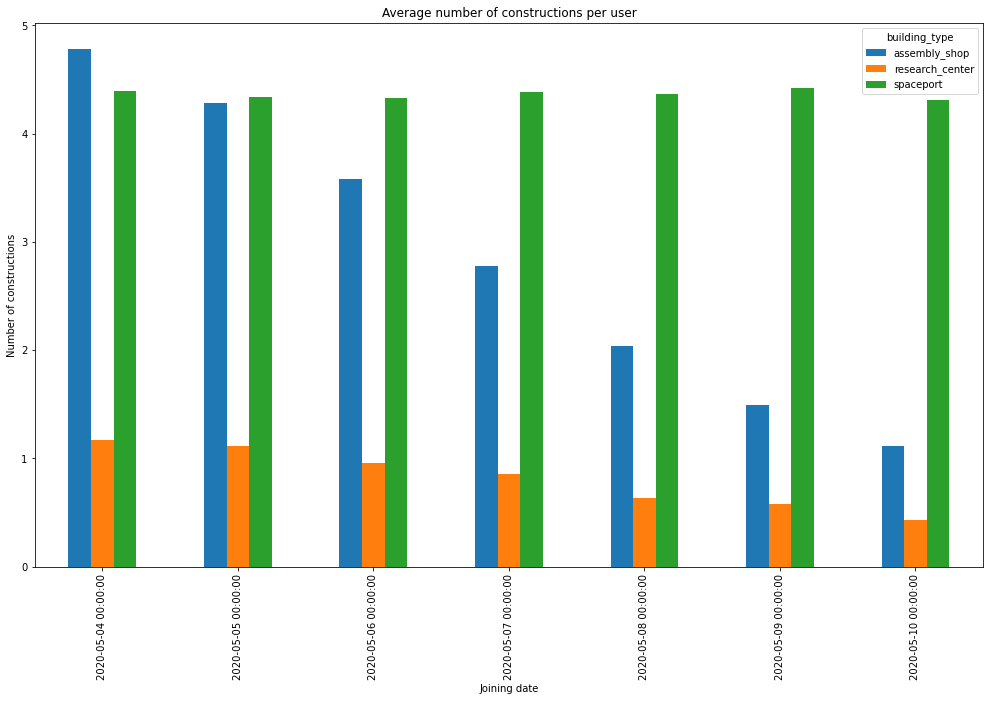

In [43]:
n_build = n_build_type.pivot_table(index='first_event', columns='building_type', values='avg_n_build_per_user')
ax = n_build.plot(kind='bar', figsize=(17,10), title = "Average number of constructions per user")
ax.set_xlabel('Joining date')
ax.set_ylabel('Number of constructions')

As we can see, the spaceport is built at the same level from cohort to cohort. At the same time, the number of assembly shops built decreased by almost five times. The research center is being built as a whole several times less, and their number has also decreased from cohort to cohort. We do not know the exact algorithm for passing the game, but it is necessary to pay attention to this.

***Look at number of users from different traffic sources. What was the average cost of attraction. Estimate how much an ad should cost per view in order to recoup user acquisition and make a profit. Is there any connection between the number of events and the channel of attraction.***

In [44]:
events_total.head()

,event_datetime,event,building_type,user_id,project_type,first_event,event_date,source,time_to_first_event
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days


In [45]:
users_per_source = events_total.groupby(['first_event', 'source']).agg({'user_id': 'nunique', 'event': 'count'}).reset_index()
users_per_source.columns=['first_event', 'source', 'n_new_users', 'n_events']
users_per_source.head()

,first_event,source,n_new_users,n_events
0,2020-05-04,facebook_ads,1184,13222
1,2020-05-04,google_play_ads,2078,22436
2,2020-05-04,instagram_new_adverts,1452,16063
3,2020-05-04,youtube_channel_network,1146,12505
4,2020-05-05,facebook_ads,694,7311


In [46]:
source_ratio = pd.merge(users_per_source, users_per_cohort, on='first_event')
source_ratio['ratio_per_source'] = source_ratio['n_new_users'] / source_ratio['n_users']
source_ratio['events_per_us_per_source'] = source_ratio['n_events'] / source_ratio['n_users']
source_ratio.head()

,first_event,source,n_new_users,n_events,n_users,ratio_per_source,events_per_us_per_source
0,2020-05-04,facebook_ads,1184,13222,5860,0.202048,2.256314
1,2020-05-04,google_play_ads,2078,22436,5860,0.354608,3.828669
2,2020-05-04,instagram_new_adverts,1452,16063,5860,0.247782,2.741126
3,2020-05-04,youtube_channel_network,1146,12505,5860,0.195563,2.133959
4,2020-05-05,facebook_ads,694,7311,3361,0.206486,2.175245


In [47]:
ad_cost.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [48]:
ad_cost.columns=['source', 'first_event', 'cost_per_click']
total_cost = pd.merge(source_ratio, ad_cost, on=['first_event', 'source'])
total_cost['cost_per_event'] = total_cost['cost_per_click'] / total_cost['events_per_us_per_source']
total_cost.head()

,first_event,source,n_new_users,n_events,n_users,ratio_per_source,events_per_us_per_source,cost_per_click,cost_per_event
0,2020-05-04,facebook_ads,1184,13222,5860,0.202048,2.256314,548.354480,243.031104
1,2020-05-04,google_play_ads,2078,22436,5860,0.354608,3.828669,554.651494,144.867969
2,2020-05-04,instagram_new_adverts,1452,16063,5860,0.247782,2.741126,502.925451,183.474017
3,2020-05-04,youtube_channel_network,1146,12505,5860,0.195563,2.133959,259.073224,121.404966
4,2020-05-05,facebook_ads,694,7311,3361,0.206486,2.175245,260.185754,119.612135


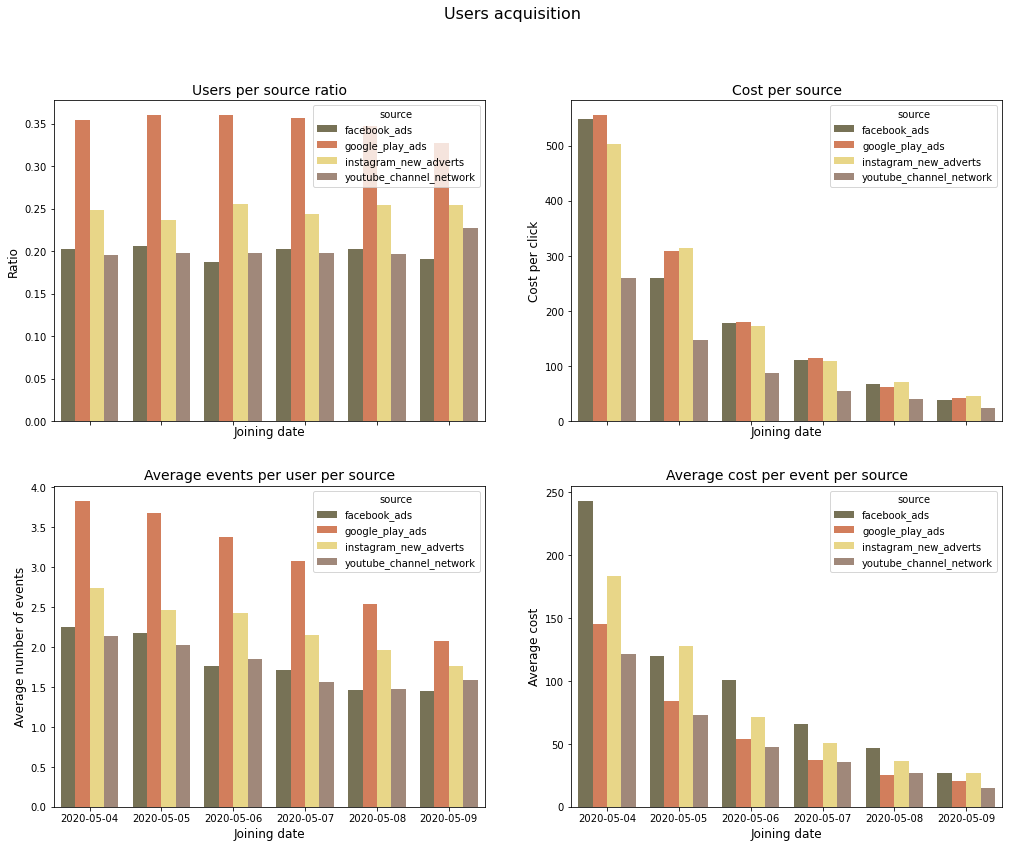

In [49]:
colors = {'facebook_ads':'#7d7650', 'google_play_ads':'#e67548', 'instagram_new_adverts':'#f8e078', 
          'youtube_channel_network':'#a68674'}
cmap = total_cost['source'].map(colors)

fig, axs = plt.subplots(2, 2, sharex=True, figsize=(17, 13))
plt.suptitle('Users acquisition', fontsize = 16)

x_dates = total_cost['first_event'].dt.strftime('%Y-%m-%d')

sns.barplot(ax=axs[0, 0], x=x_dates, y='ratio_per_source', hue='source', data=total_cost, palette=cmap) 
axs[0, 0].set_title('Users per source ratio', fontsize=14)
axs[0, 0].set_xlabel('Joining date', fontsize=12)
axs[0, 0].set_ylabel('Ratio', fontsize=12)

sns.barplot(ax=axs[0, 1], x=x_dates, y='cost_per_click', hue='source', data=total_cost, palette=cmap) 
axs[0, 1].set_title('Cost per source', fontsize=14)
axs[0, 1].set_xlabel('Joining date', fontsize=12)
axs[0, 1].set_ylabel('Cost per click', fontsize=12)

sns.barplot(ax=axs[1, 0], x=x_dates, y='events_per_us_per_source', hue='source', data=total_cost, palette=cmap) 
axs[1, 0].set_title('Average events per user per source', fontsize=14)
axs[1, 0].set_xlabel('Joining date', fontsize=12)
axs[1, 0].set_ylabel('Average number of events', fontsize=12)

sns.barplot(ax=axs[1, 1], x=x_dates, y='cost_per_event', hue='source', data=total_cost, palette=cmap) 
axs[1, 1].set_title('Average cost per event per source', fontsize=14)
axs[1, 1].set_xlabel('Joining date', fontsize=12)
axs[1, 1].set_ylabel('Average cost', fontsize=12)

plt.show()

1. With regard to acquisition channels, we see a fairly stable picture. Most of the users every day came from Google ads, followed by Instagram. 
2. As for the cost, we can talk about several facts:
   - The cost of advertising on Google is not much more than Facebook and Instagram, while it attracts much more users.
   - Per week cost per click has decreased significantly 
   - With the cost per click the number of new users has decreased, and they are less interested in the game. Perhaps, if the marketing department returns to a more expensive, but more active audience, the company will be able to attract more customers, and due to their activity in the construction of various types of buildings, it will recoup its costs and earn money from showing them advertising. 
3. We see that users who come from Google are on average more active and make more events.
4. If we focus on attracting an active audience through Google, the approximate cost of showing one ad in an application should cost at least $ 150

### Step4

**Test a hypothesis on the difference in completion time between users who finish the stage by building the assembly and those who do so by beating the boss**
Formulate a statistical hypothesis regardin the results of analysis and test it.

Making samples

In [50]:
 events_total.head()

,event_datetime,event,building_type,user_id,project_type,first_event,event_date,source,time_to_first_event
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,youtube_channel_network,0 days


In [51]:
satellite=events_total.query('event == "project"').reset_index(drop=True)
satellite['event'].value_counts()

project    1866
Name: event, dtype: int64

In [52]:
sat_dic = satellite['user_id'].unique()
sat_dic

array(['c07b1c10-f477-44dc-81dc-ec82254b1347',
       '65a92713-5969-48b1-8945-bfefa5063887',
       'fa352362-d258-472c-b295-2796ccc39fa3', ...,
       '92c1bdec-8449-4769-bf15-203c8e5830cc',
       '825e727b-7847-4c5f-a26c-3ee0f18d8177',
       '637a8d39-3872-4549-80cc-bebee6c88056'], dtype=object)

In [53]:
bos=events_total.query('event == "finished_stage_1"').reset_index(drop=True)
boss=bos.query('user_id not in @sat_dic')
boss['event'].value_counts()

finished_stage_1    3951
Name: event, dtype: int64

In [54]:
finish_satellite=pd.merge(satellite, finish_date, on='user_id')
finish_satellite.reset_index(drop=True)
finish_satellite['time_to_finish'] = finish_satellite['finish_date'] - finish_satellite['first_event']
finish_satellite.shape

(1866, 11)

In [55]:
finish_boss=pd.merge(boss, finish_date, on='user_id')
finish_boss.reset_index(drop=True)
finish_boss['time_to_finish'] = finish_boss['finish_date'] - finish_boss['first_event']
finish_boss.shape

(3951, 11)

Let's formulate null hypothesis H₀ and alternative hypothesis, H₁. 
H₀: There is no difference in completion time between users who finish the stage by building the assembly and those who do so by beating the boss
H₁: There is a significant difference in completion time between users who finish the stage by building the assembly and those who do so by beating the boss

Let's first apply Levene's test to check if variances differ significantly

In [56]:
fin_satellite = finish_satellite.groupby('time_to_finish')['user_id'].count()
fin_boss = finish_boss.groupby('time_to_finish')['user_id'].count()

stat, p = levene(fin_satellite, fin_boss)
p

0.07217406614678082

A p value is higher than 0.05, it means that equal_var = True will need to be used

In [57]:
alpha = 0.05

results = st.ttest_ind(fin_satellite, fin_boss, equal_var=True) 

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value: 0.13713541713456162
We can't reject the null hypothesis


We can't say that there is a significant difference in completion time between users who finish the stage by building the assembly and those who do so by beating the boss.

**Test a hypothesis on the difference in completion time between users who came from Google and users who came from others sourses**

In [58]:
source['source'].value_counts()

google_play_ads            4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_network    2686
Name: source, dtype: int64

In [59]:
finish=events_total.query('event == "finished_stage_1"').reset_index(drop=True)
finish_=pd.merge(finish, finish_date, on='user_id')
finish_.reset_index(drop=True)
finish_['time_to_finish'] = finish_['finish_date'] - finish_['first_event']
finish_.head()

,event_datetime,event,building_type,user_id,project_type,first_event,event_date,source,time_to_first_event,finish_date,time_to_finish
0,2020-05-15 05:29:13,finished_stage_1,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,2020-05-04,facebook_ads,0 days,2020-05-15,11 days
1,2020-05-16 11:51:58,finished_stage_1,NaN,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,2020-05-04,instagram_new_adverts,0 days,2020-05-16,12 days
2,2020-05-11 14:18:05,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,2020-05-04,google_play_ads,0 days,2020-05-11,7 days
3,2020-05-16 13:08:11,finished_stage_1,NaN,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,2020-05-04,2020-05-04,facebook_ads,0 days,2020-05-16,12 days
4,2020-05-18 03:50:27,finished_stage_1,NaN,65a92713-5969-48b1-8945-bfefa5063887,NaN,2020-05-04,2020-05-04,google_play_ads,0 days,2020-05-18,14 days


Let's formulate null hypothesis H₀ and alternative hypothesis, H₁. 
H₀: There is no difference in completion time between users who users who came from Google and users who came from others sourses
H₁: There is a significant difference in completion time between users who users who came from Google and users who came from others sourses

In [60]:
fin_google = finish_[finish_['source']=='google_play_ads'].groupby('time_to_finish')['user_id'].count()
fin_others = finish_[finish_['source']!='google_play_ads'].groupby('time_to_finish')['user_id'].count()

In [61]:
alpha = 0.05

results = st.ttest_ind(fin_google, fin_others) 

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value: 0.06742731984952699
We can't reject the null hypothesis


We can't say that there is a significant difference in completion time between users who users who came from Google and users who came from others sourses

In [65]:
events_total.to_csv('events_total.csv')

<a id="oc"></a>

### Overall conclusion

1. All the users made the first event on the same day when they clicked on the advertisement.
2. Every day the number of players starting to play is significantly decreasing. 
3. Players complete the first level on average in 11-12 days. It can also be seen that the later the players joined, the fewer people went to the finish line.
4. Not only the number of attracted new players is decreasing, but also the interest of new users in the game itself. With a difference of only 7 days in the game, the number of events decreased from 11 to 6 on average, the percentage of those who completed the first stage - from 45 to 30.
5. The spaceport is built at the same level from cohort to cohort. At the same time, the number of assembly shops built decreased by almost five times. The research center is being built as a whole several times less, and their number has also decreased from cohort to cohort. 
6. With regard to acquisition channels, we see a fairly stable picture. Most of the users every day came from Google ads, followed by Instagram. 
7. As for the cost, we can talk about several facts:
   - The cost of advertising on Google is not much more than Facebook and Instagram, while it attracts much more users.
   - Per week cost per click has decreased significantly 
   - With the cost per click the number of new users has decreased, and they are less interested in the game. Perhaps, if the marketing department returns to a more expensive, but more active audience, the company will be able to attract more customers, and due to their activity in the construction of various types of buildings, it will recoup its costs and earn money from showing them advertising. 
8. Users who come from Google are on average more active and make more events.
9. If we focus on attracting an active audience through Google, the approximate cost of showing one ad in an application should cost at least $ 150
10. We can't say that there is a significant difference in completion time between users who finish the stage by building the assembly and those who do so by beating the boss.
11. We can't say that there is a significant difference in completion time between users who users who came from Google and users who came from others sourses.

Recommendations:

1. I would recommend to return to a more expensive in terms of cost per click, but more active audience. WE will be able to attract more customers, and due to their activity in the construction of various types of buildings, it will recoup its costs and earn money from showing them advertising. 

2. The basic monetization as showing ads on the screen where the user selects the type of objects to be constructed is a good option, but we have to pay attantion on decreasing number of consrtucted assemnly shops and research center. 

3. A large number of advertisements can scare users away from the game. You can offer players to watch ads to speed up the game process, or buy this acceleration for money.